In [1]:
import gpmultipy, scipy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from gpmultipy import dataset
from gpmultipy.model import Model
from gpmultipy.prior import Prior
from gpmultipy.kernel import RBF, White, Addition
from gpmultipy.freeze import Freezer
from gpmultipy.sampler.slice import Slice
from gpmultipy.kernel import Product, Linear

In [3]:
%matplotlib inline

In [4]:
ds = dataset.DataSet('data/')
x,y,effect,labels = ds.build(Strain='ura3',mM_PQ=0.0,scale='range',effects=['Well'])
y = np.log2(y)
y = (y-y.mean())/y.std()

In [5]:
edge = range(101,111) + range(111,191,10) + range(120,191,10) + range(191,201) + range(201,211) + range(211,291,10) + range(220,291,10) + range(291,301)
edge = np.array(edge)
edge

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 121, 131,
       141, 151, 161, 171, 181, 120, 130, 140, 150, 160, 170, 180, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
       204, 205, 206, 207, 208, 209, 210, 211, 221, 231, 241, 251, 261,
       271, 281, 220, 230, 240, 250, 260, 270, 280, 290, 291, 292, 293,
       294, 295, 296, 297, 298, 299, 300])

In [6]:
dist = np.array([min(abs(l-edge)) for l in labels[0]])
position = (dist==0).astype(int)

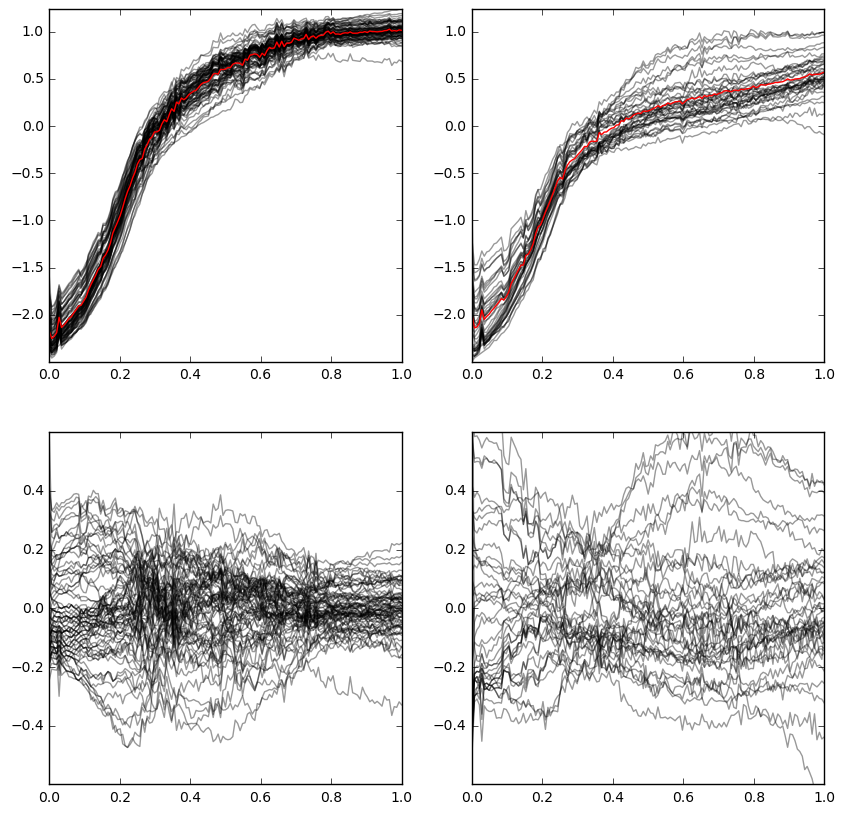

In [7]:
plt.figure(figsize=(10,10))
for i,p in enumerate([0,1]):
    select = position==p
    
    plt.subplot(2,2,i+1)
    plt.plot(x,y[:,select],c='k',alpha=.4)
    plt.plot(x,y[:,select].mean(1),c='r',alpha=1)
    plt.ylim(y.min(),y.max())
    
    plt.subplot(2,2,i+3)
    plt.plot(x,y[:,select]-y[:,select].mean(1)[:,None],c='k',alpha=.4)
    plt.ylim(-.6,.6)

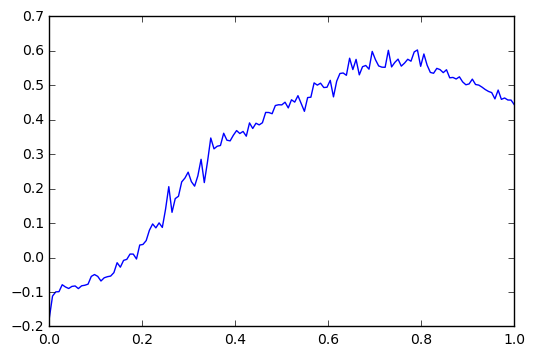

In [8]:
plt.plot(x,y[:,position==0].mean(1) - y[:,position==1].mean(1))

In [27]:
def wellPosition(number):
    number = int(number)
    if number > 100:
        return wellPosition(number%100)
    if number == 0:
        return 9,9
    return [(number-1) % 10, (number-1)/10]

zip(labels[0],map(wellPosition,labels[0]))

[(102, [1, 0]),
 (103, [2, 0]),
 (104, [3, 0]),
 (124, [3, 2]),
 (125, [4, 2]),
 (126, [5, 2]),
 (145, [4, 4]),
 (146, [5, 4]),
 (147, [6, 4]),
 (166, [5, 6]),
 (167, [6, 6]),
 (168, [7, 6]),
 (201, [0, 0]),
 (202, [1, 0]),
 (203, [2, 0]),
 (204, [3, 0]),
 (205, [4, 0]),
 (206, [5, 0]),
 (207, [6, 0]),
 (208, [7, 0]),
 (209, [8, 0]),
 (210, [9, 0]),
 (211, [0, 1]),
 (212, [1, 1]),
 (213, [2, 1]),
 (214, [3, 1]),
 (215, [4, 1]),
 (216, [5, 1]),
 (217, [6, 1]),
 (218, [7, 1]),
 (219, [8, 1]),
 (220, [9, 1]),
 (221, [0, 2]),
 (222, [1, 2]),
 (223, [2, 2]),
 (224, [3, 2]),
 (225, [4, 2]),
 (226, [5, 2]),
 (227, [6, 2]),
 (228, [7, 2]),
 (229, [8, 2]),
 (230, [9, 2]),
 (231, [0, 3]),
 (232, [1, 3]),
 (233, [2, 3]),
 (234, [3, 3]),
 (235, [4, 3]),
 (236, [5, 3]),
 (237, [6, 3]),
 (238, [7, 3]),
 (239, [8, 3]),
 (240, [9, 3]),
 (241, [0, 4]),
 (242, [1, 4]),
 (243, [2, 4]),
 (244, [3, 4]),
 (245, [4, 4]),
 (246, [5, 4]),
 (247, [6, 4]),
 (248, [7, 4]),
 (249, [8, 4]),
 (250, [9, 4]),
 (251, [

In [28]:
position = np.array(map(wellPosition,labels[0]))

In [29]:
dist = np.column_stack((position.min(1),(9-position).min(1))).min(1)
dist

array([0, 0, 0, 2, 2, 2, 4, 4, 3, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 2, 3,
       3, 3, 3, 2, 1, 0, 0, 1, 2, 3, 4, 4, 3, 2, 1, 0, 0, 1, 2, 3, 4, 4, 3,
       2, 1, 0, 0, 1, 2, 3, 3, 3, 3, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

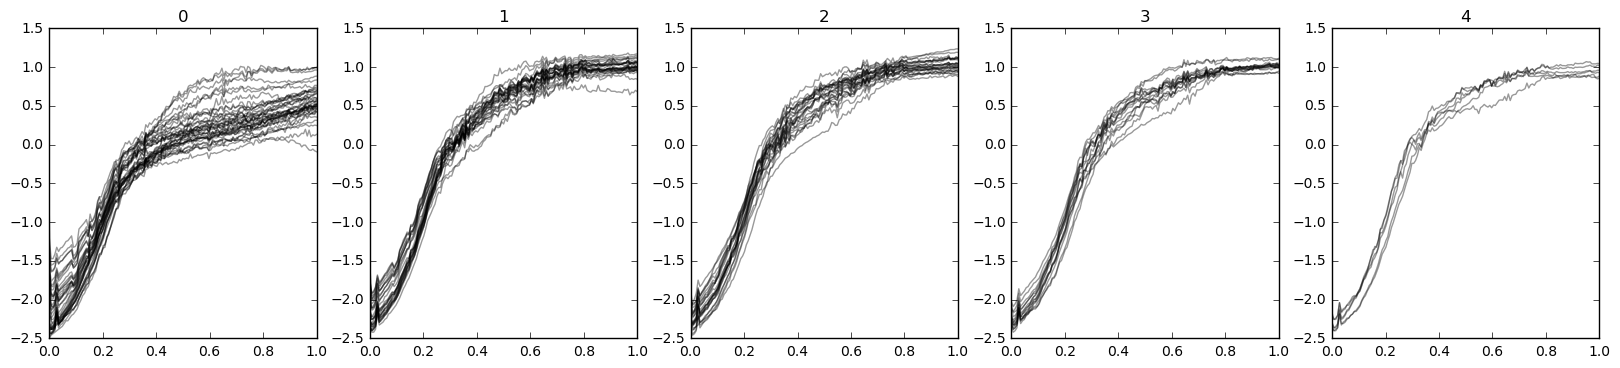

In [31]:
plt.figure(figsize=(4*np.unique(dist).shape[0],4))
for i,d in enumerate(np.unique(dist)):
    select = dist==d
    
    plt.subplot(1,np.unique(dist).shape[0],i+1)
    plt.title(d)
    plt.plot(x,y[:,select],c='k',alpha=.4)